Installing dependencies

In [1]:
!pip install opencv-python


In [2]:
!pip install tensorflow


In [3]:
!pip install numpy


In [4]:
!pip install pandas


In [5]:
!pip install keras

In [6]:
!pip install adam


In [7]:
!pip install kwargs

ERROR: Could not find a version that satisfies the requirement kwargs (from versions: none)
ERROR: No matching distribution found for kwargs


In [8]:
!pip install cinit

Import Libraries

In [9]:
import sys, os
import pandas as pd
import numpy as np

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
#from keras.utils import np_utils

from keras.utils import to_categorical
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt


In [12]:
# Load the existing CSV file
df = pd.read_csv('C:\\Users\\Anita Jose\\Software Engineering Project\\fer2013.csv')
print(df)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [13]:
df.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [14]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [15]:
print(df["Usage"].value_counts())


Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [16]:
print(df.head())


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [17]:
df.shape
#gives(rows,column)

(35887, 3)

In [18]:
#X_train: Stores pixel data for training.
#train_y: Stores emotion labels for training.
#X_test: Stores pixel data for testing (validation).
#test_y: Stores emotion labels for testing.

X_train,train_y,X_test,test_y=[],[],[],[]
#separates pixel data and emotion labels into training and testing datasets
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [19]:
num_features = 64   #define the number of filters in Conv2D layers
num_labels = 7  #set the number of neurons in the final dense layer
batch_size = 64   #The number of samples processed simultaneously during training
epochs = 75
width, height = 48, 48

In [20]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')
#converting to array

In [21]:
#convert labels into a one-hot encoded formatinto a binary matrix representation)
train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

In [22]:
X_train -= np.mean(X_train, axis=0)  #Computes the mean of the training data across all samples for each feature (column) and substracts from each feature
X_train /= np.std(X_train, axis=0)  #Computes the standard deviation for each feature and divides each
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

#CNNs expect inputs in the form (num_samples, height, width, num_channels) for image data.
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) #28,709 images, each 48x48 pixels with 1 channel (grayscale).
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1) #3,589 images, each 48x48 pixels with 1 channel (grayscale).

In [23]:
# Function to preprocess pixels
def preprocess_pixels(pixels_column):
    # Convert strings of space-separated pixel values to numpy arrays
    pixel_arrays = np.array([np.fromstring(pixels, dtype=np.uint8, sep=' ') for pixels in pixels_column])
    # Reshape each array to 48x48 matrix and add a channel dimension (grayscale)
    #The -1 means that NumPy will automatically calculate the number of samples (images)
    pixel_arrays = pixel_arrays.reshape((-1, 48, 48, 1))
    # Normalize pixel values to range 0-1
    pixel_arrays = pixel_arrays / 255.0
    return pixel_arrays 
    #This function returns a 4D NumPy array with shape (num_samples, 48, 48, 1) where each sample is a 48x48 grayscale image with normalized pixel values.

# Apply preprocessing to 'pixels' column
images = preprocess_pixels(df['pixels'])

# One-hot encode emotion labels
labels = to_categorical(df['emotion'], num_classes=7)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, train_y, test_y = train_test_split(
    images, labels, test_size=0.3, stratify=labels, random_state=42
)
#stratify=labels: Ensures that the distribution of labels in both training and testing sets is similar to the original dataset.
#Setting random_state fixes the randomness for a given operation, ensuring the same output across runs.


# Verify shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


#25,120 images, each of size 48x48 with 1 channel (grayscale).
#10,767 images, each of size 48x48 with 1 channel.

Training data shape: (25120, 48, 48, 1)
Testing data shape: (10767, 48, 48, 1)


In [24]:
#Data Augmentation :artificially expand the size of the training dataset by creating variations of the existing images.

#helps prevent overfitting and can improve the model's generalization ability

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,          # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,     # Randomly shift images horizontally by 10% of width
    height_shift_range=0.1,     # Randomly shift images vertically by 10% of height
    zoom_range=0.1,             # Randomly zoom into images by 10%
    horizontal_flip=True        # Randomly flip images horizontally
)

# Fit the generator to the training data
datagen.fit(X_train)


In [25]:
#Enhanced CNN model
model = Sequential()

# Layer 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
#Extracts features from the input (48x48 grayscale images with 1 channel) using 64 filters of size 3x3
#Activation function relu introduces non-linearity, allowing the network to learn complex patterns.
model.add(BatchNormalization())
#Normalizes the activations of the previous layer to stabilize learning and accelerate convergence.
model.add(MaxPooling2D(pool_size=(2, 2)))
#Down-samples the feature maps by taking the maximum value in 2×2 regions, reducing spatial dimensions and computational load.
model.add(Dropout(0.25))
#Randomly drops 25% of the neurons during training to prevent overfitting.

#If the dropout rate is too low (e.g., 10%), it might not provide enough regularization, allowing overfitting.
#If the dropout rate is too high (e.g., 50% or more), it might excessively reduce the effective network capacity, leading to underfitting.

# Layer 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))  # Additional convolutional layer to capture even more complex features before down-sampling with MaxPooling2D
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten()) #Converts the 3D feature maps into a 1D vector to feed into the dense (fully connected) layers.
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) #Learns high-level abstract features. Dropout of 50% is applied to reduce overfitting.
model.add(Dense(256, activation='relu'))  # Additional fully connected layer
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # Output layer

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()


D:\Downloads\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,275,847 (8.68 MB)

 Trainable params: 2,274,439 (8.68 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [26]:
# Define callbacks

#Callbacks are functions that are executed at certain points during training, such as after each epoch. 
#They allow you to automate tasks like stopping training early or adjusting the learning rate based on validation performance.

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True) #stop training early if the model's performance on the validation set stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_lr=1e-6, verbose=1) #reduces the learning rate when the model’s performance stops improving

callbacks = [early_stopping, reduce_lr]


In [27]:
import tensorflow.keras as keras

# gen = ImageDataGenerator()
# train_generator = datagen.flow(X_train, train_y, batch_size=batch_size)#training
# validation_generator = ImageDataGenerator().flow(X_test, test_y, batch_size=batch_size)#testing

# # Compile the model
# model.compile(
#     loss='categorical_crossentropy', #computes the difference between the predicted probability distribution (from the model) and the true probability distribution (the one-hot encoded labels)
#     optimizer=keras.optimizers.Adam(), #adjusts the learning rate during training based on the gradients of the loss function
#     metrics=['accuracy'] #measures the proportion of correct predictions over the total number of predictions
# )

# # Fit the model
# model.fit(
#     train_generator,
#     steps_per_epoch=len(X_train) // batch_size,  # Number of steps per epoch
#     validation_data=validation_generator,
#     validation_steps=len(X_test) // batch_size,  # Number of validation steps
#     epochs=100,                              # Maximum number of epochs
#     callbacks=callbacks,                        # Apply the callbacks
#     verbose=1
# )

gen = ImageDataGenerator()
train_generator = gen.flow(X_train, train_y, batch_size=batch_size)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(train_generator, steps_per_epoch=batch_size, epochs=epochs)


Epoch 1/75


D:\Downloads\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - accuracy: 0.1871 - loss: 3.2281
Epoch 2/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.2095 - loss: 2.0258
Epoch 3/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.2304 - loss: 1.9035
Epoch 4/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.2424 - loss: 1.8463
Epoch 5/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.2808 - loss: 1.7856
Epoch 6/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.2932 - loss: 1.7514
Epoch 7/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3181 - loss: 1.7010 
Epoch 8/75


D:\Downloads\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.3169 - loss: 1.7066
Epoch 9/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.3327 - loss: 1.6688
Epoch 10/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.3643 - loss: 1.6080
Epoch 11/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.3602 - loss: 1.6250
Epoch 12/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.3932 - loss: 1.5837
Epoch 13/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 438ms/step - accuracy: 0.4037 - loss: 1.5347
Epoch 14/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.3341 - loss: 1.5807  
Epoch 15/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 464ms/step - accuracy: 0.3980 - loss: 1.5423
Epoch 16/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 492ms/step - accuracy: 0.4108 - loss: 1.5216
Epoch 17/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 493ms/step - accuracy: 0.4154 - loss: 1.4824
Epoch 18/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 490ms/step - accuracy: 0.4250 - loss: 1.4627
Epoch 19/75
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 47

In [28]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [29]:
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 216s 534ms/step - accuracy: 0.5990 - loss: 1.0845 - val_accuracy: 0.5157 - val_loss: 1.3043
Epoch 2/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 202s 515ms/step - accuracy: 0.6071 - loss: 1.0434 - val_accuracy: 0.5674 - val_loss: 1.1667
Epoch 3/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 197s 502ms/step - accuracy: 0.6355 - loss: 0.9826 - val_accuracy: 0.5635 - val_loss: 1.1734
Epoch 4/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 207s 526ms/step - accuracy: 0.6496 - loss: 0.9412 - val_accuracy: 0.5631 - val_loss: 1.1833
Epoch 5/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 180s 458ms/step - accuracy: 0.6648 - loss: 0.8992 - val_accuracy: 0.5442 - val_loss: 1.2367
Epoch 6/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 192s 488ms/step - accuracy: 0.6837 - loss: 0.8623 - val_accuracy: 0.5899 - val_loss: 1.1781
Epoch 7/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 192s 489ms/step - accuracy: 0.6941 - loss: 0.8244 - val_accuracy: 0.5729 - val_loss: 1.1798
Epoch 8/75
393/393 ━━━━━━━━━━━━━━━━━━━━ 204s 520ms/step - accuracy: 0.7013 -

In [30]:
# history = model.fit(
#     datagen.flow(X_train, train_y, batch_size=batch_size),  # Use datagen to augment the training data
#     validation_data=(X_test, test_y),                      # Use X_test and test_y for validation (no augmentation)
#     epochs=100,                                         # Number of epochs
#     verbose=1,                                             # Display training progress
#     shuffle=True,                                    # Shuffle the training data
#     callbacks=callbacks  # Pass the predefined list of callbacks here
# )


In [31]:
fer_json = model.to_json()  #converts the model architecture (the layers and structure) into a JSON format
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights(".weights.h5") #saves the model’s learned weights


In [32]:
train_score = model.evaluate(X_train, train_y, verbose=0) #evaluate the performance of the trained model on the given datase
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

# the model, when evaluated on the training data, has a loss of 0.029 and an accuracy of 99.19%

test_score = model.evaluate(X_test, test_y, verbose=0) #evaluates the model on the testing data.
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

#the model, when evaluated on the testing data, has a loss of 1.95 and an accuracy of 60.38%.

Train loss: 0.030096953734755516
Train accuracy: 99.27945733070374
Test loss: 1.849029302597046
Test accuracy: 60.55539846420288


337/337 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step


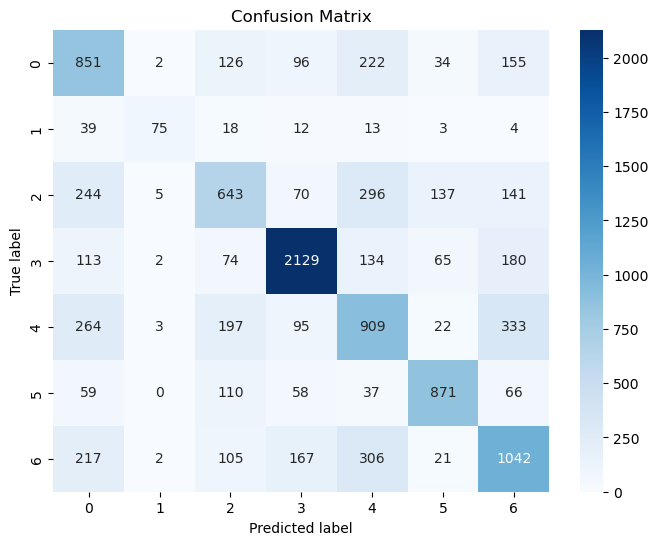

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#The confusion matrix helps to assess how well the model is performing in terms of correctly classifying images into the correct categories.

# Assuming you have trained your model and obtained predictions on test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(test_y, axis=1)  # Convert one-hot encoded true labels back to categorical

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


#shows how many times the model predicted each class correctly (diagonal elements) and how many times it made mistakes (off-diagonal elements).

In [34]:
def emotion_analysis(emotions):
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  y_pos = np.arange(len(objects))
  plt.bar(y_pos, emotions, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('percentage')
  plt.title('emotion')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


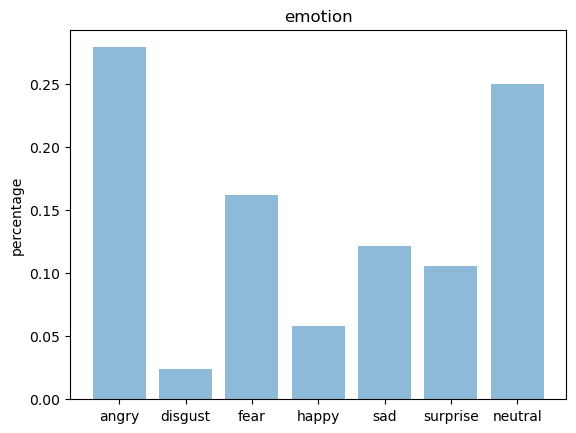

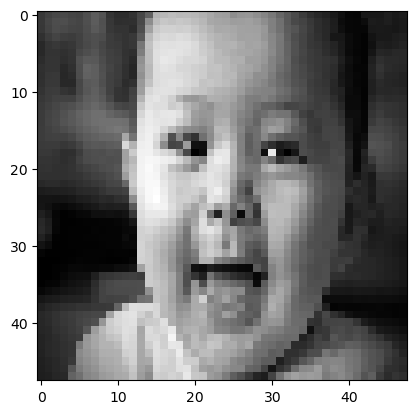

In [35]:
from keras.preprocessing import image


# Load an image for prediction
img = image.load_img("C:\\Users\\Anita Jose\\Software Engineering Project\\babyface.jpg", color_mode="grayscale", target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255  # Normalize

# Predict emotion
custom = model.predict(x)
emotion_analysis(custom[0])  # Function to plot emotion probabilities

# Reshape and display the image
x = x.reshape(48, 48)
plt.gray()
plt.imshow(x)
plt.show()


In [36]:
# Real-time webcam emotion detection code using Haar Cascade Classifier
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# Load the trained model
model = model_from_json(open("fer.json", "r").read())
model.load_weights('.weights.h5')

# OpenCV for capturing video
cap = cv2.VideoCapture(0)
face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\Anita Jose\\Music recommendation via real time emotion detection\\haarcascade_frontalface_default.xml')

while True:
    ret, test_img = cap.read()
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), 7)
        roi_gray = gray_img[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)  # Add batch dimension
        img_pixels /= 255  # Normalize

        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])
        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow('Emotion Detector', test_img)

    if cv2.waitKey(1) == ord('q'):  # Exit if 'q' is pressed
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
import time
from collections import Counter

# Load the trained model
model = model_from_json(open("fer.json", "r").read())
model.load_weights('.weights.h5')

# Initialize OpenCV for capturing video
cap = cv2.VideoCapture(0)  # 0 is the default webcam

# Check if the webcam is successfully opened
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Load Haar Cascade Classifier
face_haar_cascade = cv2.CascadeClassifier('C:\\Users\\Anita Jose\\Music recommendation via real time emotion detection\\haarcascade_frontalface_default.xml')

# Initialize variables for emotion tracking
emotion_history = []
start_time = time.time()

# Emotions list
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

print("Press 'q' to quit.")

while True:
    ret, test_img = cap.read()  # Capture frame
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Convert to grayscale for face detection
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_haar_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)

    # Process each detected face
    for (x, y, w, h) in faces:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), 7)
        roi_gray = gray_img[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)  # Add batch dimension
        img_pixels /= 255  # Normalize

        # Predict emotion
        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])
        predicted_emotion = emotions[max_index]
        emotion_history.append(predicted_emotion)

        # Display the detected emotion on the video
        cv2.putText(test_img, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the video feed
    cv2.imshow('Emotion Detector', test_img)

    # Calculate the most frequent emotion every minute
    if time.time() - start_time >= 60:  # 1 minute elapsed
        emotion_count = Counter(emotion_history)
        avg_emotion = emotion_count.most_common(1)[0][0]  # Most common emotion
        print(f"Average emotion for the past minute: {avg_emotion}")
        emotion_history.clear()  # Reset the history
        start_time = time.time()  # Reset the timer

        # Fetch songs or perform further actions here based on avg_emotion
        # e.g., fetch_playlist(avg_emotion)

    # Exit on pressing 'q'
    if cv2.waitKey(1) == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 